# Proyek analisis data : Bike Sharing Dataset
- **Nama:** Nizham Aufar
- **Email:** nizham.aufar.tik23@stu.pnj.ac.id
- **ID Dicoding:** nizhamaufarstupnj

## Menentukan Pertanyaan Bisnis

- 1 Bagaimana Pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?
- 2 Bagaimana pola penyewaan di hari kerja vs hari libur berdasarkan jam nya
- 3 Bagaimana Perbedaan Pola Penyewaan Sepeda antara Pengguna Kasual dan Pengguna terdaftar?

## Import

In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data wrangling

### GATHERING DATA

In [109]:
df_Day = pd.read_csv('data/day.csv')
df_Hour = pd.read_csv('data/hour.csv')

In [110]:
df_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [111]:
df_Hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### ASESSING DATA

1. Menganalisa setiap feature pada dataset

2. Mencari tipe data yang tidak sesuai

3. Mengecek missing value pada dataset

4. Mengecek duplicated value pada dataset

In [112]:
df_Day.info()

# TODO 
# 1. ubah tipe data 'dteday' di df_Day menjadi datetime64 
# 2. perjelas beberapa feature yang kurang informatif (season, weathersit, mnth, hr, weekday, cnt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [113]:
df_Hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [114]:
#CHECK MISSING VALUE
df_Day.isna().sum()
df_Hour.isna().sum()
# There is no missing value in both datasets

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [115]:

#CHECK DUPLICATE VALUE
df_Day.duplicated().sum()
df_Hour.duplicated().sum() 
# There is no duplicate value in both datasets

0

### CLEANING DATA

In [116]:
df_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [117]:
df_Hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [118]:
# RENAME DATASET'S COLUMNS

df_Day.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'holiday':'is_holiday',
    'weekday':'day_of_week',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'temp':'temperature_celsius',
    'atemp':'feels_like_temperature_celsius',
    'hum':'humidity_percentage',
    'windspeed':'windspeed_kmh',
    'casual':'casual_users',
    'registered':'registered_users',
    'cnt':'total_users'
}, inplace=True)

In [119]:
# RENAME DATASET'S COLUMNS

df_Hour.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'holiday':'is_holiday',
    'weekday':'day_of_week',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'temp':'temperature_celsius',
    'atemp':'feels_like_temperature_celsius',
    'hum':'humidity_percentage',
    'windspeed':'windspeed_kmh',
    'casual':'casual_users',
    'registered':'registered_users',
    'cnt':'total_users'
}, inplace=True)

In [120]:
# SCALING BACK THE FEATURES TO ORIGINAL VALUE
df_Day['temperature_celsius'] = df_Day['temperature_celsius'] * 41
df_Day['feels_like_temperature_celsius'] = df_Day['feels_like_temperature_celsius'] * 50
df_Day['humidity_percentage'] = df_Day['humidity_percentage'] * 100
df_Day['windspeed_kmh'] = df_Day['windspeed_kmh'] * 67

In [121]:
# SCALING BACK THE FEATURES TO ORIGINAL VALUE
df_Hour['temperature_celsius'] = df_Hour['temperature_celsius'] * 41
df_Hour['feels_like_temperature_celsius'] = df_Hour['feels_like_temperature_celsius'] * 50
df_Hour['humidity_percentage'] = df_Hour['humidity_percentage'] * 100
df_Hour['windspeed_kmh'] = df_Hour['windspeed_kmh'] * 67

In [122]:
# Mapping Season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_Day['season_label'] = df_Day['season'].map(season_map)
df_Hour['season_label'] = df_Hour['season'].map(season_map)

In [123]:
# Mapping Weather
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}

df_Day['weather_label'] = df_Day['weather_condition'].map(weather_map)
df_Hour['weather_label'] = df_Hour['weather_condition'].map(weather_map)

In [124]:
# Convert 'date' column to datetime type
df_Hour['date'] = pd.to_datetime(df_Hour['date'])
df_Day['date'] = pd.to_datetime(df_Day['date'])

In [125]:
df_Day['year_label'] = df_Day['year'].map({0: 2011, 1: 2012})
df_Hour['year_label'] = df_Hour['year'].map({0: 2011, 1: 2012})


In [126]:
df_Day.head()

,instant,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_condition,temperature_celsius,feels_like_temperature_celsius,humidity_percentage,windspeed_kmh,casual_users,registered_users,total_users,season_label,weather_label,year_label
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,Spring,Mist/Cloudy,2011
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,Spring,Mist/Cloudy,2011
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,Spring,Clear/Partly Cloudy,2011
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,Spring,Clear/Partly Cloudy,2011
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,Spring,Clear/Partly Cloudy,2011


In [127]:
df_Hour.head()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature_celsius,feels_like_temperature_celsius,humidity_percentage,windspeed_kmh,casual_users,registered_users,total_users,season_label,weather_label,year_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16,Spring,Clear/Partly Cloudy,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40,Spring,Clear/Partly Cloudy,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32,Spring,Clear/Partly Cloudy,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13,Spring,Clear/Partly Cloudy,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1,Spring,Clear/Partly Cloudy,2011


In [128]:
df_Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   instant                         731 non-null    int64         
 1   date                            731 non-null    datetime64[ns]
 2   season                          731 non-null    int64         
 3   year                            731 non-null    int64         
 4   month                           731 non-null    int64         
 5   is_holiday                      731 non-null    int64         
 6   day_of_week                     731 non-null    int64         
 7   is_workingday                   731 non-null    int64         
 8   weather_condition               731 non-null    int64         
 9   temperature_celsius             731 non-null    float64       
 10  feels_like_temperature_celsius  731 non-null    float64       
 11  humidi

In [129]:
df_Hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   instant                         17379 non-null  int64         
 1   date                            17379 non-null  datetime64[ns]
 2   season                          17379 non-null  int64         
 3   year                            17379 non-null  int64         
 4   month                           17379 non-null  int64         
 5   hour                            17379 non-null  int64         
 6   is_holiday                      17379 non-null  int64         
 7   day_of_week                     17379 non-null  int64         
 8   is_workingday                   17379 non-null  int64         
 9   weather_condition               17379 non-null  int64         
 10  temperature_celsius             17379 non-null  float64       
 11  fe

## EXPLORATORY DATA ANALISIS

#### 1. Bagaimana pengaruh Musim dan Cuaca terhadap jumlah penyewa? 

/var/folders/mw/0ktg0s2n021d3v7pjlsk81sc0000gp/T/ipykernel_4976/2183786583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='total_users', data=seasonal_stats, ax=ax[0], palette='coolwarm')
/var/folders/mw/0ktg0s2n021d3v7pjlsk81sc0000gp/T/ipykernel_4976/2183786583.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_label', y='total_users', data=weather_stats, ax=ax[1], palette='viridis')


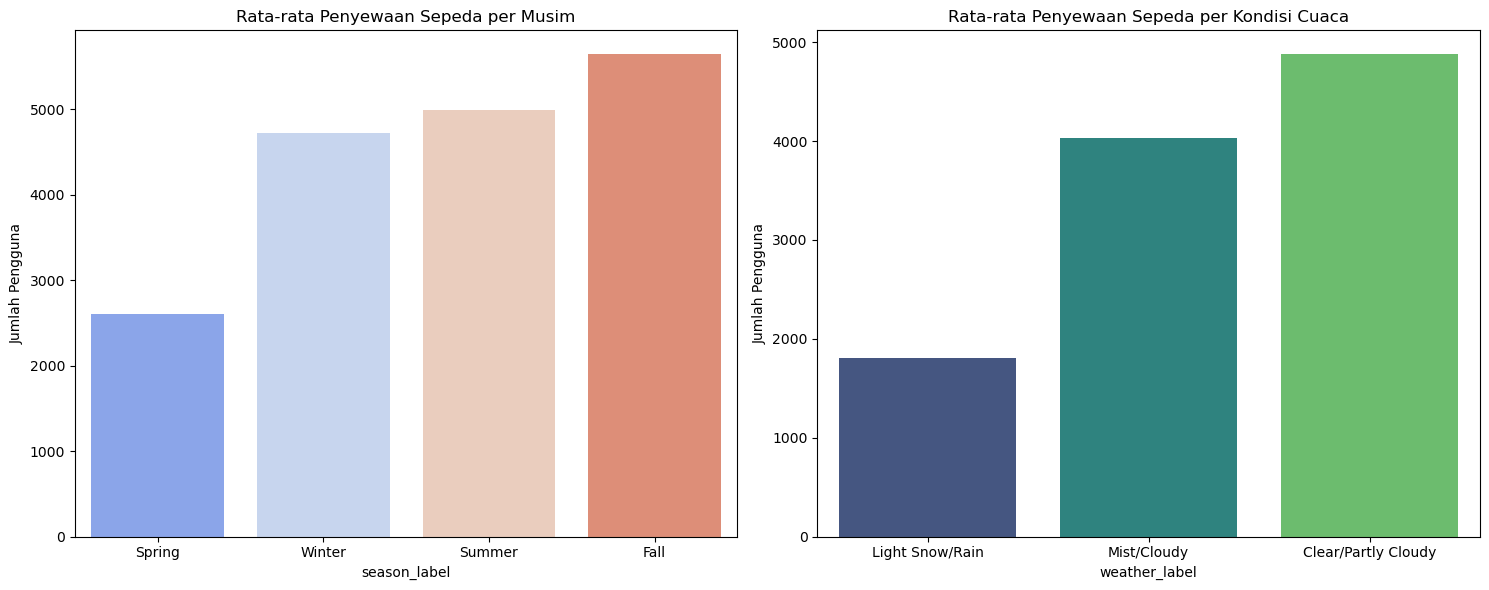

In [130]:
seasonal_stats = df_Day.groupby('season_label')[['total_users']].mean().reset_index().sort_values('total_users')
weather_stats = df_Day.groupby('weather_label')[['total_users']].mean().reset_index().sort_values('total_users') 

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='season_label', y='total_users', data=seasonal_stats, ax=ax[0], palette='coolwarm')
ax[0].set_title('Rata-rata Penyewaan Sepeda per Musim')
ax[0].set_ylabel('Jumlah Pengguna')

# Plot Cuaca
sns.barplot(x='weather_label', y='total_users', data=weather_stats, ax=ax[1], palette='viridis')
ax[1].set_title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca')
ax[1].set_ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()

##### Hasil Analisis 

Berdasarkan musim, paling banyak adalah fall (musim gugur) dan kalau berdasarkan kondisi cuaca adalah Clear (cuaca carah ) atau sedikit berawan 

#### 2. Bagaimana pola penyewaan di hari kerja vs hari libur berdasarkan jam nya ?

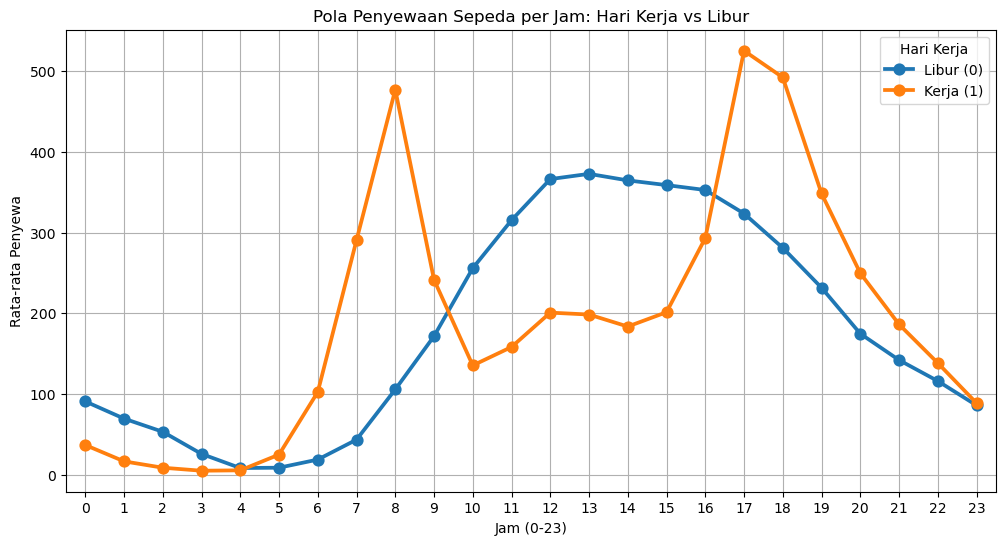

In [131]:
plt.figure(figsize=(12, 6))

sns.pointplot(x='hour', y='total_users', hue='is_workingday', data=df_Hour, errorbar=None)

plt.title('Pola Penyewaan Sepeda per Jam: Hari Kerja vs Libur')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Penyewa')
plt.legend(title='Hari Kerja', labels=['Libur (0)', 'Kerja (1)'])
plt.grid(True)
plt.show()

##### Hasil analisis

1. Hari kerja mempunyai dua puncak yaitu pada jam 8 pagi dan 5 sore yang mana itu adalah jam berangkat dan pulang kerja,
2. untuk hari libur grafik nya cembung pada siang hari (kemungkinan orang jalan jalan). 

#### 3. Bagaimana pola penyewaan antara pengguna Casual dan Registered berdasarkan hari?

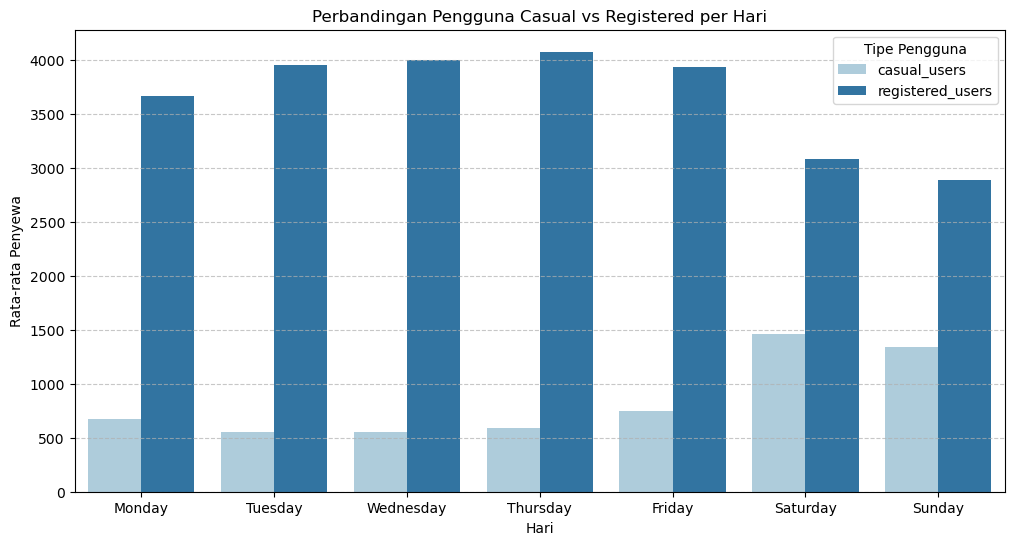

In [132]:
df_Day['day_name'] = df_Day['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

user_type_stats = df_Day.groupby('day_name')[['casual_users', 'registered_users']].mean().reindex(day_order)

plt.figure(figsize=(12, 6))

user_type_melt = user_type_stats.reset_index().melt(id_vars='day_name', var_name='User Type', value_name='Average Rentals')

sns.barplot(x='day_name', y='Average Rentals', hue='User Type', data=user_type_melt, palette='Paired')

plt.title('Perbandingan Pengguna Casual vs Registered per Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewa')
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### kesimpulan 

1. Registered User, grafiknya tinggi pada weekday dan turun pada weekend, yang menandakan mereka menggunakan sepeda untuk pergi bekerja atau sekolah 
2. Casual user, berbanding kebalik dengan registered user, grafik nya melonjak pada weekend walaupun secara overal tidak lebih banyak dari user langganan tapi ini membuktikan ada nya lonjakan pengguna baru untuk sekedar jalan jalan 

## ANALIS LANJUTAN (CLUSTERING)

/var/folders/mw/0ktg0s2n021d3v7pjlsk81sc0000gp/T/ipykernel_4976/1383685483.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='total_users', data=time_stats, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='magma')


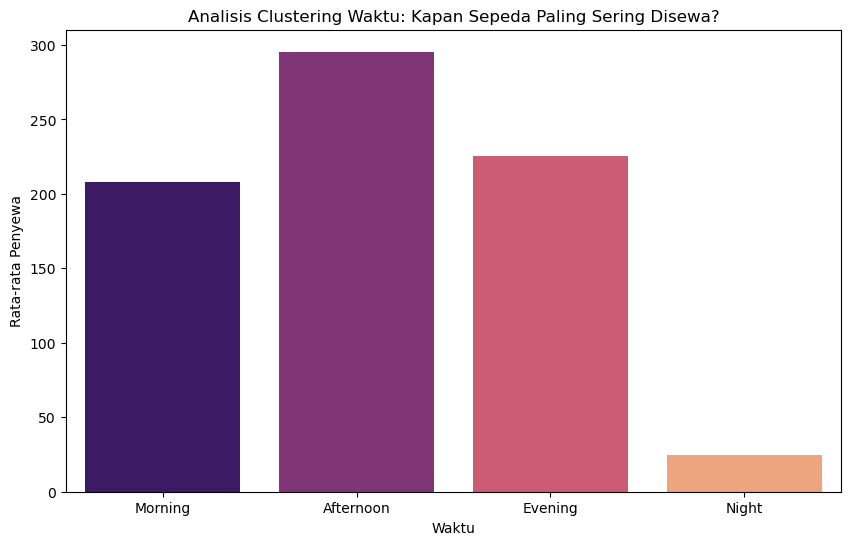

In [133]:
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_Hour['time_of_day'] = df_Hour['hour'].apply(categorize_time_of_day)

# Cek performa tiap kategori waktu
time_stats = df_Hour.groupby('time_of_day')[['total_users']].mean().reset_index()

# Visualisasi Clustering
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='total_users', data=time_stats, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='magma')
plt.title('Analisis Clustering Waktu: Kapan Sepeda Paling Sering Disewa?')
plt.xlabel('Waktu')
plt.ylabel('Rata-rata Penyewa')
plt.show()

In [134]:
!pip freeze > requirements.txt